# **Mã hóa dữ liệu**

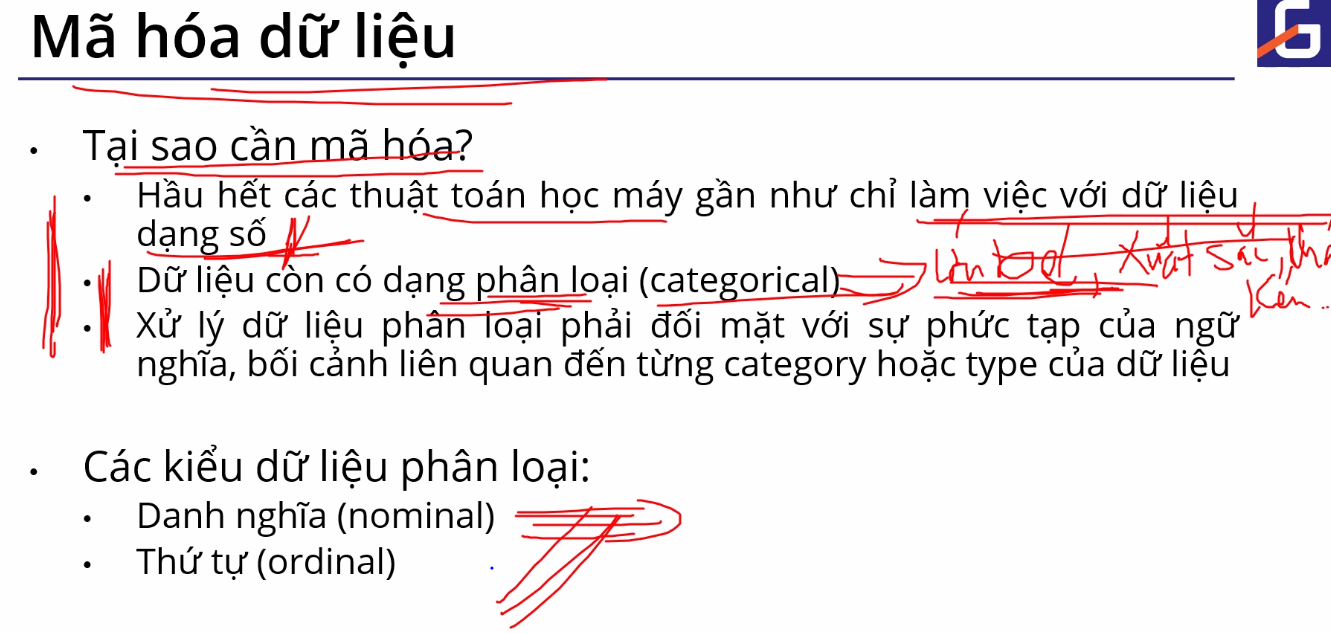

**Giới thiệu:**
Hầu hết các thuật toán học máy gần như chỉ làm việc với dữ liệu dạng số, tuy nhiên, bên cạnh dữ liệu dạng số chúng ta còn có dữ liệu dạng khác gọi là dạng phân loại (categorical data). Xử lý dữ liệu số thường dễ hơn dữ liệu phân loại bởi chúng ta không phải đối mặt với sự phức tạp của ngữ nghĩa, bối cảnh liên quan đến từng category hoặc type của dữ liệu. 

Đối với các thuật toán học máy không thể làm việc trực tiếp với dữ liệu dạng phân loại, ta cần phải đưa chúng về dạng số. 

Có hai dạng chính của dữ liệu phân loại là danh nghĩa (nominal) và thứ tự (ordinal).

- Phân loại danh nghĩa (nominal) là dạng dữ liệu không có khái niệm sắp xếp giữa các giá trị của thuộc tính đó. 
Ví dụ: Ta có phân loại các kiểu thời tiết như sau.

Có thể thấy có 6 kiểu thời tiết tương ứng với 6 phân lớp từ hình trên. Giữa các kiểu thời tiết này không có ràng buộc về thứ tự: mưa không nhất thiết phải xuất hiện sau nắng, ….

Tương tự các thể loại phim ảnh, âm nhạc, video, tên quốc gia, loại thực phẩm là các ví dụ khác về phân loại danh nghĩa.

- Phân loại thứ tự (ordinal) là dạng dữ liệu mang một số ý nghĩa về thứ tự giữa các giá trị của nó. 
Ví dụ hình dưới đây cho việc phân loại kích cỡ áo. Thứ tự giữa các nhóm được thể hiện rất rõ ràng trong trường hợp này như khi nói về “size” áo sơ mi thì S < M < L

Tương tự như cỡ áo, cỡ giày, trình độ học vấn, … là các ví dụ khác cho dạng phân loại thứ tự.

Đối với dữ liệu nominalnomial, không có mối quan hệ về thứ tự, ta có thể áp dụng phương pháp one-hot encoding để chuyển đổi dữ liệu về dạng số. Sau đây, ta sẽ tìm hiểu về one-hot encoding.

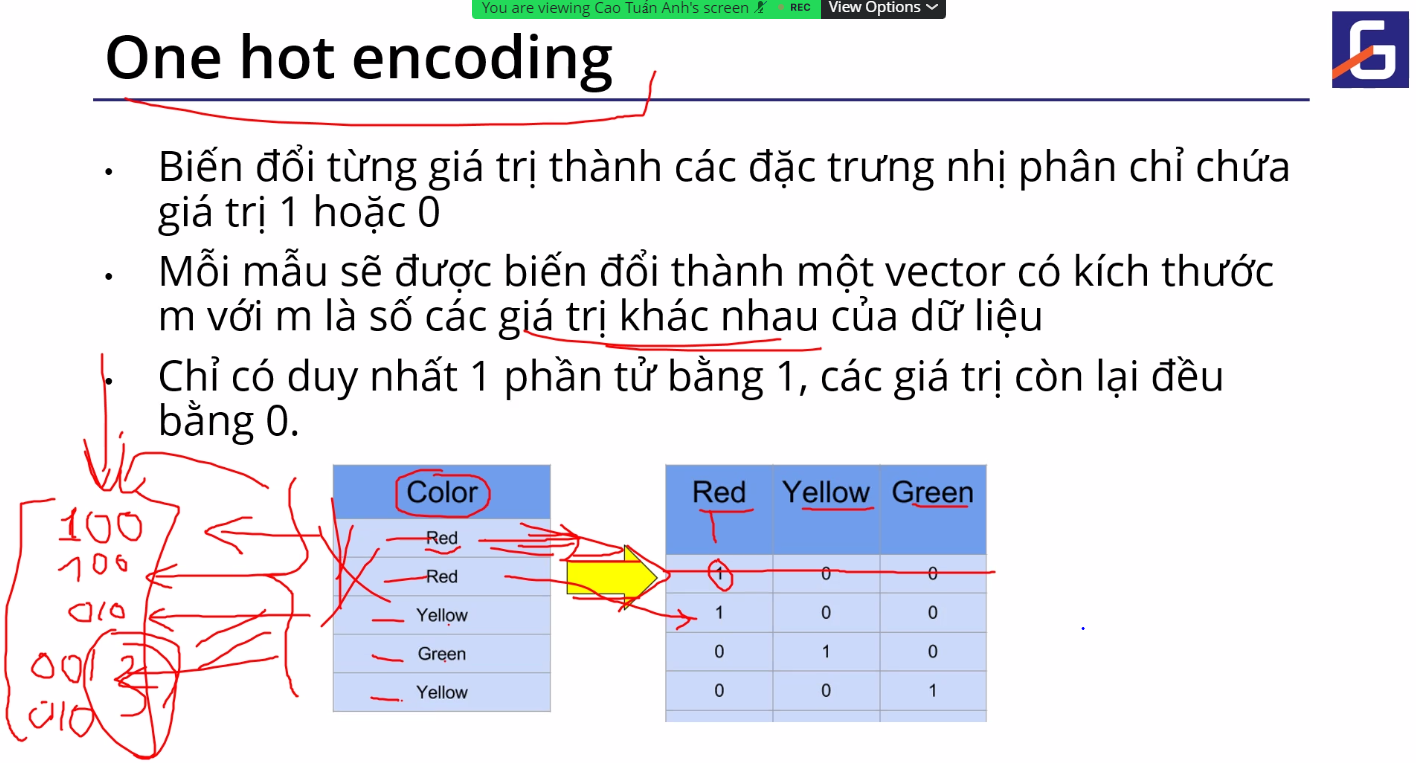

## **1. One hot encoding**

In [3]:
# Thường được áp dụng kiểu text, không có thứ tự
# Dữ liệu cồng kềnh vì quy đổi ra giá trị 0, 1, dữ liệu thừa rất nhiều
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
data = asarray([['red'], ['red'], ['yellow'], ['green'], ['yellow']])
data

array([['red'],
       ['red'],
       ['yellow'],
       ['green'],
       ['yellow']], dtype='<U6')

In [4]:
type(data)

numpy.ndarray

In [5]:
# Kiểu array
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(data)
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [7]:
import numpy as np
dm = ['red', 'red', 'yellow', 'green', 'yellow']
sr = np.array(dm)
sr = sr.reshape(-1,1)
sr

array([['red'],
       ['red'],
       ['yellow'],
       ['green'],
       ['yellow']], dtype='<U6')

In [11]:
onehot = encoder.fit_transform(sr)
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [4]:
# Thực hiện mã hóa One-hot encoding bằng Pandas - Series
import pandas as pd
dm = ['red', 'red', 'yellow', 'green', 'yellow']
ser = pd.Series(dm)
ser

0       red
1       red
2    yellow
3     green
4    yellow
dtype: object

In [14]:
import pandas as pd
df = ['red', 'red', 'yellow', 'green', 'yellow']
df = pd.DataFrame(df, index=[1,2,3,4,5], columns=['color'])
df

,color
1,red
2,red
3,yellow
4,green
5,yellow


In [15]:
onehot = encoder.fit_transform(df['color'].values.reshape(-1,1))
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [19]:
# Mã hóa với pandas
pd.get_dummies(df)

,color_green,color_red,color_yellow
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
5,0,0,1


In [18]:
type(pd)

module

## **2. Label encoding**

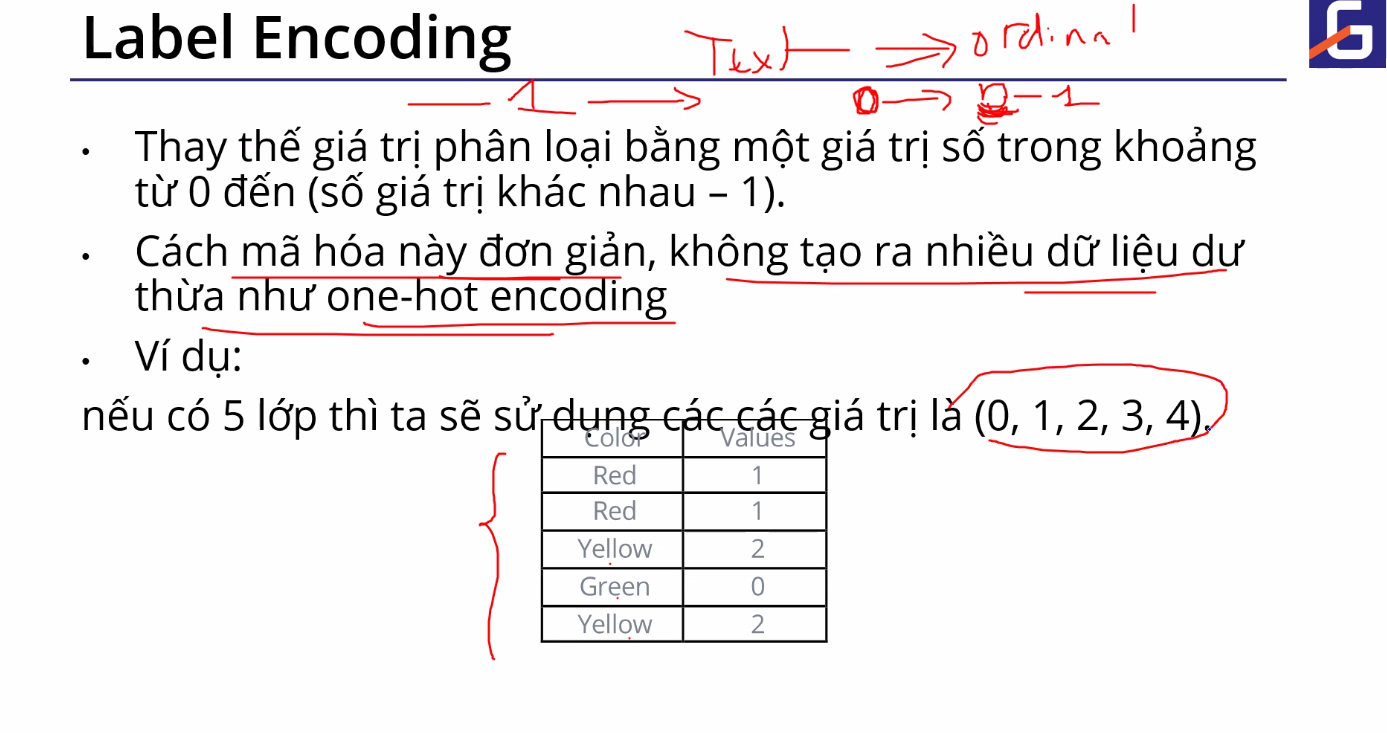
- Mã hóa bằng gán nhãn dữ liệu

In [25]:
# Thường được sử dụng với thứ tự trước sau
# Mỗi text đại diện cho 1 số, không trùng nhau
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
lb = encoder.fit_transform(['red', 'red', 'yellow', 'green', 'yellow'])
lb

array([1, 1, 2, 0, 2], dtype=int64)

In [22]:
lb = encoder.fit_transform(df['color'].values)
lb

array([1, 1, 2, 0, 2])

In [26]:
df

,color
1,red
2,red
3,yellow
4,green
5,yellow


In [23]:
# Mã hóa với pandas
df['color'].dtype

dtype('O')

In [27]:
# See also: https://stackoverflow.com/questions/51102205/how-to-know-the-labels-assigned-by-astypecategory-cat-codes
# Sắp xếp theo alphabet và gán số thứ tự
df['color'].astype('category').cat.codes

1    1
2    1
3    2
4    0
5    2
dtype: int8

In [33]:
# Giai thích:
# Màu nào số nào
a = df['color'].unique()
a = sorted(a)
label = [i for i in range(len(a))]
_dict = {a[i]: i for i in range(len(a))}
_dict

{'green': 0, 'red': 1, 'yellow': 2}

In [34]:
encoded = []
for i in df['color'].values:
    if i in _dict.keys():
        encoded.append(_dict[i])
encoded

[1, 1, 2, 0, 2]

In [35]:
encoded = pd.DataFrame(encoded)
encoded

,0
0,1
1,1
2,2
3,0
4,2


## **3. Ordinary encoding**

In [51]:
# Mã hóa với scikit-learn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X =[['S', 1], ['M', 2], ['L', 3]]
X 

[['S', 1], ['M', 2], ['L', 3]]

In [38]:
enc.fit_transform(X)

array([[2., 0.],
       [1., 1.],
       [0., 2.]])

In [45]:
scale_mapper = {'Low': 1, 'Medium': 2, 'High': 3}
df['Scale'] = df['Score'].replace(scale_mapper)
df                                  

,Score,Scale
0,Low,1
1,Low,1
2,Medium,2
3,Medium,2
4,High,3
5,Low,1
6,Medium,2
7,High,3
8,Low,1


In [44]:
df = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High", "Low", "Medium","High", "Low"]})
df

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High
5,Low
6,Medium
7,High
8,Low


# **Rời rạc hóa dữ liệu**

## **1. Dùng hàm `cut`**

In [5]:
# Giam bớt sự tính toán
# Nếu định nghĩa/quy định các khoản cụ thể trong bins
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41,32]
bins = [18, 25, 35, 60, 100]
pd.cut(ages, bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [6]:
# ĐỒng nhất với ký hiệu toán học cho các khoảng, dấu ngoặc đơn có nghĩa là cạnh đó mở, trong khi dấu ngoặc vuông có nghĩa là cạnh đó bị đóng (bao gồm). 
# Chúng ta có thể thay đổi phía bị đóng bằng cách truyền vào tham số right = False:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [7]:
# Trong trường hợp nó không quy định các khoản thì nó lấy sum(min+max)/2
cut_data = pd.cut(ages, 4)
cut_data

[(19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], ..., (30.25, 40.5], (50.75, 61.0], (40.5, 50.75], (40.5, 50.75], (30.25, 40.5]]
Length: 12
Categories (4, interval[float64, right]): [(19.959, 30.25] < (30.25, 40.5] < (40.5, 50.75] < (50.75, 61.0]]

In [8]:
# lấy ra index của nhóm tương ứng với các phần tử
cut_data.codes

array([0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 2, 1], dtype=int8)

In [9]:
# lấy ra các nhóm
cut_data.categories

IntervalIndex([(19.959, 30.25], (30.25, 40.5], (40.5, 50.75], (50.75, 61.0]], dtype='interval[float64, right]')

In [10]:
# Thống kê số lượng phần tử ở mỗi nhóm
pd.value_counts(cut_data)

(19.959, 30.25]    6
(30.25, 40.5]      3
(40.5, 50.75]      2
(50.75, 61.0]      1
dtype: int64

In [12]:
# Chuyển các tên nhóm của riêng mình bằng cách truyền vào một danh sách các nhãn
# danh sách nhãn
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [15]:
# sinh dữ liệu ngẫu nhiên gồm 20 phần tử
import numpy as np
data = np.random.rand(20)
data

array([0.12443932, 0.93110021, 0.11817032, 0.6056374 , 0.85397162,
       0.91806688, 0.76576971, 0.02110743, 0.50620091, 0.40698281,
       0.53867496, 0.32325233, 0.88495977, 0.18293332, 0.6551747 ,
       0.3691182 , 0.28091965, 0.80241221, 0.46701129, 0.53327226])

In [16]:
cut_data = pd.cut(data, 4, precision=2)
cut_data

[(0.02, 0.25], (0.7, 0.93], (0.02, 0.25], (0.48, 0.7], (0.7, 0.93], ..., (0.25, 0.48], (0.25, 0.48], (0.7, 0.93], (0.25, 0.48], (0.48, 0.7]]
Length: 20
Categories (4, interval[float64, right]): [(0.02, 0.25] < (0.25, 0.48] < (0.48, 0.7] < (0.7, 0.93]]

In [17]:
pd.value_counts(cut_data)

(0.7, 0.93]     6
(0.25, 0.48]    5
(0.48, 0.7]     5
(0.02, 0.25]    4
dtype: int64

## **2. Dùng hàm `qcut`**

In [51]:
# Lấy số lượng phần tử 1 khoảng bằng nhau
# Các nhóm có kích thước gần bằng nhau
cut_data = pd.qcut(ages, 4)
cut_data

[(19.999, 22.75], (19.999, 22.75], (22.75, 29.0], (22.75, 29.0], (19.999, 22.75], ..., (29.0, 38.0], (38.0, 61.0], (38.0, 61.0], (38.0, 61.0], (29.0, 38.0]]
Length: 12
Categories (4, interval[float64, right]): [(19.999, 22.75] < (22.75, 29.0] < (29.0, 38.0] < (38.0, 61.0]]

# **Thực hành**

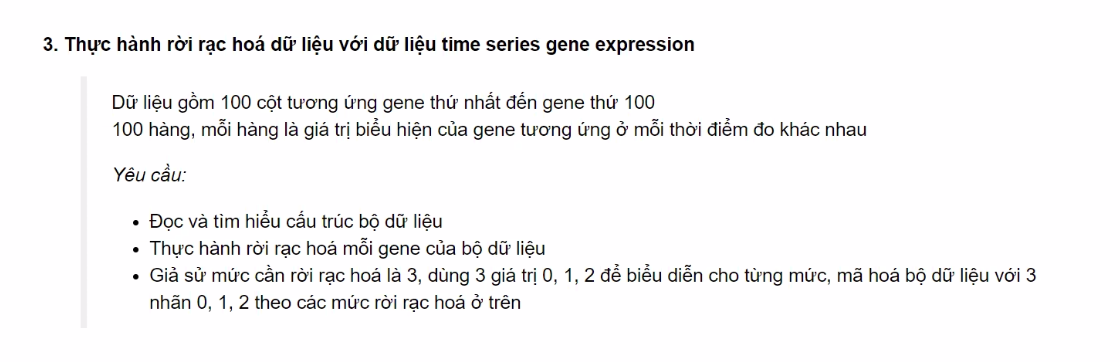

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [4]:
# Dữ liệu thô: Độ giá trị khác nhau rất lớn > độ tính toán phức tạp tiêu toán nhiều tài nguyên
genes = pd.read_csv('gene_expression.csv')

In [60]:
genes.shape

(100, 100)

In [22]:
genes.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G91,G92,G93,G94,G95,G96,G97,G98,G99,G100
0,0.096999,0.227366,0.431403,0.350564,0.614166,0.037278,0.608806,0.402018,0.024301,0.534258,...,0.520794,0.348856,0.648020,0.460299,0.422432,0.640388,0.238413,0.651695,0.536379,0.640927
1,0.140357,0.116043,0.498218,0.286252,0.708196,0.037699,0.645638,0.447637,0.031831,0.444297,...,0.609565,0.446938,0.655062,0.370700,0.522416,0.594598,0.209250,0.590257,0.561454,0.548147
2,0.075864,0.215462,0.245413,0.263025,0.695526,0.057789,0.659812,0.423609,0.005288,0.504874,...,0.720783,0.311021,0.637153,0.415287,0.405801,0.523387,0.278230,0.551977,0.588909,0.571148
3,0.081394,0.193503,0.561137,0.133510,0.657569,0.053319,0.534083,0.415155,0.010994,0.408166,...,0.670272,0.498790,0.549552,0.368304,0.392148,0.643276,0.351833,0.681212,0.554729,0.498315
4,0.146972,0.019467,0.520126,0.200362,0.289476,0.146236,0.522055,0.325684,0.009394,0.345423,...,0.656710,0.488208,0.530460,0.392846,0.365890,0.637134,0.240219,0.672030,0.520975,0.643914


In [55]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      100 non-null    float64
 1   G2      100 non-null    float64
 2   G3      100 non-null    float64
 3   G4      100 non-null    float64
 4   G5      100 non-null    float64
 5   G6      100 non-null    float64
 6   G7      100 non-null    float64
 7   G8      100 non-null    float64
 8   G9      100 non-null    float64
 9   G10     100 non-null    float64
 10  G11     100 non-null    float64
 11  G12     100 non-null    float64
 12  G13     100 non-null    float64
 13  G14     100 non-null    float64
 14  G15     100 non-null    float64
 15  G16     100 non-null    float64
 16  G17     100 non-null    float64
 17  G18     100 non-null    float64
 18  G19     100 non-null    float64
 19  G20     100 non-null    float64
 20  G21     100 non-null    float64
 21  G22     100 non-null    float64
 22  G2

In [59]:
genes.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G91,G92,G93,G94,G95,G96,G97,G98,G99,G100
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.144753,0.238131,0.497430,0.348363,0.640078,0.044626,0.632779,0.411069,0.018478,0.457512,...,0.624771,0.427851,0.633764,0.409029,0.452488,0.625421,0.261226,0.640700,0.550504,0.639582
std,0.044210,0.049367,0.063223,0.057892,0.070170,0.018359,0.071070,0.060253,0.013653,0.064508,...,0.069455,0.062839,0.076273,0.066583,0.066099,0.062885,0.043232,0.067306,0.076958,0.072268
min,0.075864,0.019467,0.245413,0.133510,0.289476,0.012726,0.423266,0.230732,0.001901,0.232383,...,0.270370,0.179199,0.304601,0.114740,0.191925,0.352919,0.143644,0.455464,0.233315,0.335473
25%,0.123418,0.214310,0.465339,0.309886,0.600458,0.032286,0.587005,0.371785,0.009581,0.424590,...,0.585241,0.399608,0.590614,0.371815,0.413245,0.583688,0.232854,0.596074,0.511474,0.596072
50%,0.144430,0.236107,0.498217,0.345333,0.642243,0.042361,0.624626,0.405469,0.016753,0.455546,...,0.624864,0.425329,0.629857,0.407328,0.456374,0.626779,0.260245,0.635023,0.553772,0.641620
75%,0.161552,0.263767,0.537322,0.378380,0.680568,0.053851,0.673638,0.456319,0.022906,0.495078,...,0.669081,0.463704,0.676496,0.449498,0.493140,0.673498,0.285032,0.674537,0.584104,0.682374
max,0.430073,0.345238,0.660628,0.503123,0.785567,0.146236,0.870245,0.551860,0.099483,0.640334,...,0.786292,0.555481,0.842580,0.548902,0.589157,0.734597,0.368327,0.835367,0.743485,0.826818


In [24]:
genes.isna().sum()

G1      0
G2      0
G3      0
G4      0
G5      0
       ..
G96     0
G97     0
G98     0
G99     0
G100    0
Length: 100, dtype: int64

In [29]:
genes['G1'].unique()

array([0.0969991, 0.1403573, 0.0758636, 0.0813936, 0.1469715, 0.1441205,
       0.1654223, 0.1470061, 0.1104275, 0.1706772, 0.1506831, 0.1635795,
       0.1152163, 0.1471705, 0.1248381, 0.1135973, 0.1608757, 0.1451952,
       0.1239093, 0.1487047, 0.1534256, 0.1013323, 0.1958156, 0.1769662,
       0.1140425, 0.1644907, 0.1741112, 0.1683319, 0.1085707, 0.1496614,
       0.1244062, 0.1275966, 0.1513253, 0.1407653, 0.1715987, 0.1300408,
       0.4300727, 0.0923309, 0.1132597, 0.2046237, 0.1195889, 0.1567226,
       0.128088 , 0.0873229, 0.1994058, 0.1396803, 0.2031999, 0.080929 ,
       0.1798183, 0.0961289, 0.1479565, 0.1258467, 0.154007 , 0.1727989,
       0.1771121, 0.1658087, 0.1372955, 0.1447389, 0.2463545, 0.1567921,
       0.1460431, 0.1257422, 0.0779452, 0.1316427, 0.2016623, 0.1030189,
       0.1708966, 0.15619  , 0.1481669, 0.1465196, 0.1948104, 0.1919158,
       0.2274912, 0.144071 , 0.1347343, 0.119221 , 0.1573637, 0.121945 ,
       0.1044463, 0.1356061, 0.08886  , 0.1336776, 

### **Thực hiện rời rạc hóa dữ liệu**

In [9]:
genes['G1'].min()

0.0758636

In [10]:
genes['G1'].max()

0.4300727

In [11]:
a = pd.cut(genes['G1'], 3)
a[50:70]

50    (0.0755, 0.194]
51    (0.0755, 0.194]
52    (0.0755, 0.194]
53    (0.0755, 0.194]
54    (0.0755, 0.194]
55    (0.0755, 0.194]
56    (0.0755, 0.194]
57    (0.0755, 0.194]
58     (0.194, 0.312]
59    (0.0755, 0.194]
60    (0.0755, 0.194]
61    (0.0755, 0.194]
62    (0.0755, 0.194]
63    (0.0755, 0.194]
64     (0.194, 0.312]
65    (0.0755, 0.194]
66    (0.0755, 0.194]
67    (0.0755, 0.194]
68    (0.0755, 0.194]
69    (0.0755, 0.194]
Name: G1, dtype: category
Categories (3, interval[float64, right]): [(0.0755, 0.194] < (0.194, 0.312] < (0.312, 0.43]]

In [8]:
a = pd.cut(genes['G2'],3)
a[50:70]

50    (0.128, 0.237]
51    (0.128, 0.237]
52    (0.128, 0.237]
53    (0.237, 0.345]
54    (0.237, 0.345]
55    (0.128, 0.237]
56    (0.128, 0.237]
57    (0.237, 0.345]
58    (0.128, 0.237]
59    (0.237, 0.345]
60    (0.237, 0.345]
61    (0.128, 0.237]
62    (0.128, 0.237]
63    (0.237, 0.345]
64    (0.128, 0.237]
65    (0.237, 0.345]
66    (0.128, 0.237]
67    (0.128, 0.237]
68    (0.237, 0.345]
69    (0.237, 0.345]
Name: G2, dtype: category
Categories (3, interval[float64, right]): [(0.0191, 0.128] < (0.128, 0.237] < (0.237, 0.345]]

In [12]:
genes.G2.min()

0.019467

In [13]:
genes.G2.max()

0.3452378

In [17]:
len(genes.columns)

100

In [8]:
# f-strings in Python
# See also: https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/
re_genes = pd.DataFrame()
for i in range(len(genes.columns)):
    ge = pd.cut(genes[f'G{i+1}'], 3, labels = [0,1,2])
    re_genes[f'G{i+1}'] = ge
re_genes

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G91,G92,G93,G94,G95,G96,G97,G98,G99,G100
0,0,1,1,1,1,0,1,1,0,2,...,1,1,1,2,1,2,1,1,1,1
1,0,0,1,1,2,0,1,2,0,1,...,1,2,1,1,2,1,0,1,1,1
2,0,1,0,1,2,1,1,1,0,2,...,2,1,1,2,1,1,1,0,2,1
3,0,1,2,0,2,0,0,1,0,1,...,2,2,1,1,1,2,2,1,1,0
4,0,0,1,0,0,2,0,0,0,0,...,2,2,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,1,2,1,2,1,0,1,...,2,2,1,2,2,0,2,1,1,1
96,0,2,1,2,1,1,0,1,0,1,...,2,1,1,2,2,2,0,0,2,2
97,0,2,1,1,2,0,0,1,1,1,...,1,2,1,1,2,2,1,0,0,1
98,0,2,2,1,1,0,1,1,0,2,...,1,2,1,1,2,1,2,1,0,1


In [6]:
re_genes = pd.DataFrame()
for i in range(len(genes.columns)):
    ge = pd.cut(genes[f'G{i+1}'], 3, labels=[0,1,2])
    re_genes[f'G{i+1}'] = ge
re_genes[re_genes.columns[:5]]

,G1,G2,G3,G4,G5
0,0,1,1,1,1
1,0,0,1,1,2
2,0,1,0,1,2
3,0,1,2,0,2
4,0,0,1,0,0
...,...,...,...,...,...
95,0,1,1,1,2
96,0,2,1,2,1
97,0,2,1,1,2
98,0,2,2,1,1


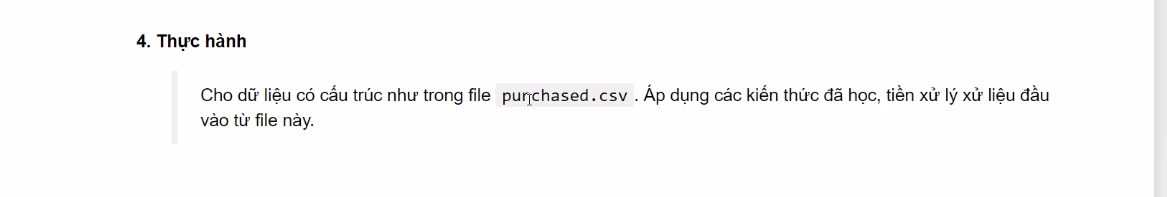

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [38]:
df = pd.read_csv('purchased.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [10]:
df.Country.value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

In [48]:
df.shape

(10, 4)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [14]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


### **Bài sửa**

In [39]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [40]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [51]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(x)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No ' 'Yes' 'No ' 'No ' 'Yes' 'Yes' 'No ' 'Yes' 'No ' 'Yes']


### **Mean & median imputation**
- Imputing missing values is the best method when you have large amounts of data to deal with. 
- The simplest methods to impute missing values include filling in a constant or the mean of the variable or other basic statistical parameters like median and mode.

In [41]:
# Import sklearn.impute
from sklearn.impute import SimpleImputer

In [42]:
# Make a copy of purchased
df_mean = df.copy(deep=True)
df_mean

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [43]:
# Create a SimpleImputer() object while performing mean imputation.
mean_imputer = SimpleImputer(strategy = 'mean')
mean_imputer

SimpleImputer()

In [28]:
df_mean.iloc[:,:]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [45]:
from sklearn.impute import SimpleImputer
imputa = SimpleImputer(missing_values= np.nan, strategy = 'mean')
imputa.fit(x[:, 1:3])
x[:, 1:3] = imputa.fit_transform(x[:, 1:3])

In [52]:
from sklearn.impute import SimpleImputer
# Create median imputer object
mean_imputer = SimpleImputer(strategy = 'mean')
x[:, 1:3] = mean_imputer.fit_transform(x[:, 1:3])

In [53]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### **Bước 4: Encoding data**

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [120]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 68500.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 35.0, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [122]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### **Bước 5: Chuẩn hóa các thuộc tính**

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:, 3:] = sc.fit_transform(x[:, 3:])

In [124]:
x

array([[1.0, 0.0, 0.0, 0.8029550685469664, 0.7006119357266064],
       [0.0, 0.0, 1.0, -1.6345871038277524, -1.4690250265235296],
       [0.0, 1.0, 0.0, -1.204432602820449, -0.9266157859609956],
       [0.0, 0.0, 1.0, -0.05735393346764024, -0.29380500530470594],
       [0.0, 1.0, 0.0, 0.229415733870562, 0.3842065453984616],
       [1.0, 0.0, 0.0, -0.4875084344749436, -0.5650096255859729],
       [0.0, 0.0, 1.0, -0.4875084344749436, -1.107418866148507],
       [1.0, 0.0, 0.0, 1.3764944032233708, 1.333422716382896],
       [0.0, 1.0, 0.0, 1.663264070561573, 1.6950288767579187],
       [1.0, 0.0, 0.0, -0.20073876713674135, 0.2486042352578281]],
      dtype=object)

### **Kết quả:**

In [125]:
x

array([[1.0, 0.0, 0.0, 0.8029550685469664, 0.7006119357266064],
       [0.0, 0.0, 1.0, -1.6345871038277524, -1.4690250265235296],
       [0.0, 1.0, 0.0, -1.204432602820449, -0.9266157859609956],
       [0.0, 0.0, 1.0, -0.05735393346764024, -0.29380500530470594],
       [0.0, 1.0, 0.0, 0.229415733870562, 0.3842065453984616],
       [1.0, 0.0, 0.0, -0.4875084344749436, -0.5650096255859729],
       [0.0, 0.0, 1.0, -0.4875084344749436, -1.107418866148507],
       [1.0, 0.0, 0.0, 1.3764944032233708, 1.333422716382896],
       [0.0, 1.0, 0.0, 1.663264070561573, 1.6950288767579187],
       [1.0, 0.0, 0.0, -0.20073876713674135, 0.2486042352578281]],
      dtype=object)

In [126]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [127]:
normalized_data = pd.DataFrame(x, columns =['0', '1', '2', 'Age', 'Salary'])
normalized_data

,0,1,2,Age,Salary
0,1.0,0.0,0.0,0.802955,0.700612
1,0.0,0.0,1.0,-1.634587,-1.469025
2,0.0,1.0,0.0,-1.204433,-0.926616
3,0.0,0.0,1.0,-0.057354,-0.293805
4,0.0,1.0,0.0,0.229416,0.384207
5,1.0,0.0,0.0,-0.487508,-0.56501
6,0.0,0.0,1.0,-0.487508,-1.107419
7,1.0,0.0,0.0,1.376494,1.333423
8,0.0,1.0,0.0,1.663264,1.695029
9,1.0,0.0,0.0,-0.200739,0.248604


In [128]:
purchased = pd.Series(y)
normalized_data['Purchased'] = purchased
normalized_data

,0,1,2,Age,Salary,Purchased
0,1.0,0.0,0.0,0.802955,0.700612,0
1,0.0,0.0,1.0,-1.634587,-1.469025,1
2,0.0,1.0,0.0,-1.204433,-0.926616,0
3,0.0,0.0,1.0,-0.057354,-0.293805,0
4,0.0,1.0,0.0,0.229416,0.384207,1
5,1.0,0.0,0.0,-0.487508,-0.56501,1
6,0.0,0.0,1.0,-0.487508,-1.107419,0
7,1.0,0.0,0.0,1.376494,1.333423,1
8,0.0,1.0,0.0,1.663264,1.695029,0
9,1.0,0.0,0.0,-0.200739,0.248604,1
